In [17]:
import sys
sys.path.append('../keras_network/')
from keras.callbacks import TensorBoard, LearningRateScheduler
import tensorflow as tf
from configargparse import ArgParser
from models import conv_model, fc_model, conv_model_tile
from losses import *
from utils import *
from data_generator import DataGenerator
import matplotlib.pyplot
%matplotlib inline

In [26]:
from clr_callback import CyclicLR

In [4]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
keras.backend.tensorflow_backend.set_session(tf.Session(config=config))

In [6]:
data_dir = '/scratch/srasp/preprocessed_data/'
train_fn = '/purecrm_ess_train_sample1_shuffle'

In [7]:
train_gen = DataGenerator(
        data_dir,
        train_fn + '_features.nc',
        train_fn + '_targets.nc',
        1024,
        shuffle=True,
    )

Generator will have 23494656 samples in 22944 batches
Features have shape 152; targets have shape 120


In [8]:
feature_shape = train_gen.feature_shape
target_shape = train_gen.target_shape

In [25]:
model = fc_model(
    feature_shape,
    target_shape,
    [512],
    1e-3,
    'mae',
    batch_norm=False,
    activation='relu'
)

In [27]:
train_gen.n_batches

22944

In [32]:
clr = CyclicLR(base_lr=0, max_lr=0.001, step_size=500)

In [33]:
model.fit_generator(
        train_gen.return_generator(),
        500,
        epochs=1,
        workers=8,
        max_queue_size=50,
        callbacks=[clr],
    )

Epoch 1/1
  1/500 [..............................] - ETA: 1:18 - loss: 0.1971 - rmse: 0.2518 - log_loss: -0.8028 - total_error: 932.0420 - unexplained_error: 18095.5332 - rsquared: -18.4149 - total_error_avgAx0: 671.4900 - rsquared_avgAx0: -25.9483

/export/home/srasp/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:119: UserWarning: Method on_batch_end() is slow compared to the batch update (0.436865). Check your callbacks.
  % delta_t_median)


  2/500 [..............................] - ETA: 3:16 - loss: 0.1633 - rmse: 0.2118 - log_loss: -0.8786 - total_error: 901.6150 - unexplained_error: 12617.4106 - rsquared: -12.8049 - total_error_avgAx0: 656.0545 - rsquared_avgAx0: -18.0463

/export/home/srasp/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:119: UserWarning: Method on_batch_end() is slow compared to the batch update (0.754214). Check your callbacks.
  % delta_t_median)


  7/500 [..............................] - ETA: 2:57 - loss: 0.1583 - rmse: 0.2064 - log_loss: -0.8886 - total_error: 907.0050 - unexplained_error: 11243.8759 - rsquared: -11.4210 - total_error_avgAx0: 661.9260 - rsquared_avgAx0: -16.0647

/export/home/srasp/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:119: UserWarning: Method on_batch_end() is slow compared to the batch update (0.408146). Check your callbacks.
  % delta_t_median)
/export/home/srasp/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:119: UserWarning: Method on_batch_end() is slow compared to the batch update (0.379428). Check your callbacks.
  % delta_t_median)
/export/home/srasp/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:119: UserWarning: Method on_batch_end() is slow compared to the batch update (0.204349). Check your callbacks.
  % delta_t_median)


500/500 [==============================] - 33s 66ms/step - loss: 0.0484 - rmse: 0.0840 - log_loss: -1.2726 - total_error: 908.7894 - unexplained_error: 2495.5264 - rsquared: -1.7394 - total_error_avgAx0: 660.8744 - rsquared_avgAx0: -2.7696


In [34]:
h = clr.history
lr = h['lr']
loss = h['loss']

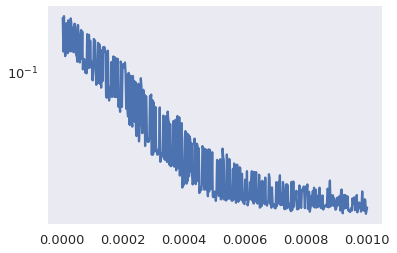

In [35]:
plt.plot(lr, loss)
plt.gca().set_yscale('log')